In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import statistics
import plotly.offline as py
import plotly.graph_objs as go
from Utils.helper import res_to_string

In [2]:
matches = pd.read_csv("Data/matches2008-2020.csv")
deliveries = pd.read_csv("Data/deliveries2008-2020.csv")
matches.replace(['Rising Pune Supergiants'], ['Rising Pune Supergiant'],inplace=True)
matches.columns, deliveries.columns

(Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
       dtype='object'),
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
        'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
        'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
        'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
        'dismissal_kind', 'fielder'],
       dtype='object'))

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   season           816 non-null    object
 2   city             816 non-null    object
 3   date             816 non-null    object
 4   team1            816 non-null    object
 5   team2            816 non-null    object
 6   toss_winner      816 non-null    object
 7   toss_decision    816 non-null    object
 8   result           816 non-null    object
 9   dl_applied       816 non-null    int64 
 10  winner           812 non-null    object
 11  win_by_runs      816 non-null    int64 
 12  win_by_wickets   816 non-null    int64 
 13  player_of_match  812 non-null    object
 14  venue            816 non-null    object
 15  umpire1          815 non-null    object
 16  umpire2          815 non-null    object
dtypes: int64(4), object(13)
memory usag

In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193404 entries, 0 to 193403
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          193404 non-null  int64 
 1   inning            193404 non-null  int64 
 2   batting_team      193404 non-null  object
 3   bowling_team      193404 non-null  object
 4   over              193404 non-null  int64 
 5   ball              193404 non-null  int64 
 6   batsman           193404 non-null  object
 7   non_striker       193398 non-null  object
 8   bowler            193404 non-null  object
 9   is_super_over     193404 non-null  int64 
 10  wide_runs         193404 non-null  int64 
 11  bye_runs          193404 non-null  int64 
 12  legbye_runs       193404 non-null  int64 
 13  noball_runs       193404 non-null  int64 
 14  penalty_runs      193404 non-null  int64 
 15  batsman_runs      193404 non-null  int64 
 16  extra_runs        193404 non-null  int

In [5]:
matches[(matches["toss_winner"] == matches["winner"])].shape[0]

418

In [6]:
start_season_indices = []
for season in (matches["season"].unique()):
    start_index = list(matches["season"]).index(season)
    start_season_indices.append(start_index)
start_season_indices.append(len(list(matches["season"])))
important_match_indices = []
for i in start_season_indices[1:]:
    important_match_indices.extend(list(range(i-4, i)))
important_match_indices = set(important_match_indices)

In [7]:
all_matches = [0, 0]
qualifiers = [0, 0]
labels = ["Win", "Lose"]
for ind, row in matches.iterrows():
    if row["winner"] == "NA":
        continue
    elif row["toss_winner"] == row["winner"]:
        all_matches[0] += 1
    else:
        all_matches[1] += 1
    if ind in important_match_indices:
        if row["winner"] == "NA":
            continue
        if row["toss_winner"] == row["winner"]:
            qualifiers[0] += 1
        else:
            qualifiers[1] += 1

In [8]:
all_matches, qualifiers

([418, 398], [31, 21])

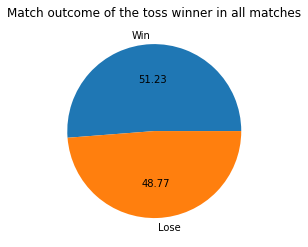

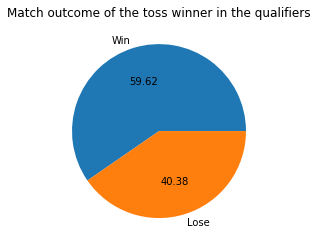

In [10]:
# plt.figure(dpi=300)
plt.pie(all_matches, labels=labels, autopct="%.2f")
plt.title("Match outcome of the toss winner in all matches")
plt.savefig("Images\\EDA\\toss_winner_all_matches.png", dpi=300)
plt.show()
# plt.figure(dpi=300)
plt.pie(qualifiers, labels=labels, autopct="%.2f")
plt.title("Match outcome of the toss winner in the qualifiers")
plt.savefig("Images\\EDA\\toss_winner_qualifiers.png", dpi=300)
plt.show()

In [12]:
home_team = {}
for index,row in matches.iterrows():
  if (not pd.isna(row['city']) and not pd.isna(row['team1']) and not pd.isna(row['team2'])):
    #print(row['season'])
    try:
      home_team[row['team1']].append(row['city'])
    except :
      home_team[row['team1']] = [row['city']] 
    try:
      home_team[row['team2']].append(row['city'])
    except:
      home_team[row['team2']] = [row['city']]
for i in home_team.keys():
  home_team[i] = statistics.mode(home_team[i])
  # print(i,home_team[i])
home_team["Punjab Kings"] = "Chandigarh"
print(home_team)

{'Sunrisers Hyderabad': 'Hyderabad', 'Royal Challengers Bangalore': 'Bangalore', 'Mumbai Indians': 'Mumbai', 'Rising Pune Supergiant': 'Pune', 'Gujarat Lions': 'Rajkot', 'Kolkata Knight Riders': 'Kolkata', 'Kings XI Punjab': 'Chandigarh', 'Delhi Capitals': 'Delhi', 'Chennai Super Kings': 'Chennai', 'Rajasthan Royals': 'Jaipur', 'Deccan Chargers': 'Hyderabad', 'Kochi Tuskers Kerala': 'Kochi', 'Pune Warriors': 'Pune', 'Punjab Kings': 'Chandigarh'}


{'htw': 300, 'atw': 238}


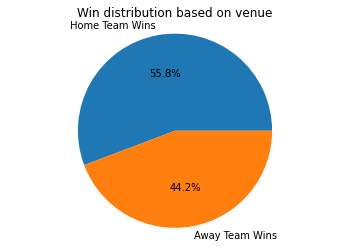

In [13]:
home_team_adv={'htw':0,'atw':0}
count=0
for index, row in matches.iterrows():
  count+=1
  if((row['city']==home_team[row['team1']]) and (row['winner']==row['team1'])):
    home_team_adv['htw']+=1
  elif((row['city']==home_team[row['team1']]) and (row['winner']==row['team2'])):
    home_team_adv['atw']+=1
  elif((row['city']==home_team[row['team2']]) and (row['winner']==row['team2'])):
    home_team_adv['htw']+=1
  elif((row['city']==home_team[row['team2']]) and (row['winner']==row['team1'])):
    home_team_adv['atw']+=1
print(home_team_adv)
plt.pie([float(v) for v in home_team_adv.values()], labels=["Home Team Wins", "Away Team Wins"],
           autopct='%1.1f%%')
plt.title("Win distribution based on venue")
plt.axis('equal')
plt.savefig("Images\\EDA\\home_team_adv.png", dpi=300)
plt.show()

In [12]:
mom={'highest_mom':0,'not_highest_mom':0}
for index, row in matches.iterrows():
  a=deliveries[deliveries['match_id'] == row['id']]
  a1=a[a['batting_team']==row['winner']]
  xyz=a1.groupby(['batsman','batting_team'])["total_runs"].sum().reset_index()
  xyz=xyz.sort_values(by=['total_runs'],ascending=False).reset_index()
  xyz.drop(['index'],axis=1,inplace=True)
  try:
    if xyz['batsman'][0] == row['player_of_match']:
      mom['highest_mom']+=1
    else:
      mom['not_highest_mom']+=1
  except:
    pass

{'highest_mom': 467, 'not_highest_mom': 345}


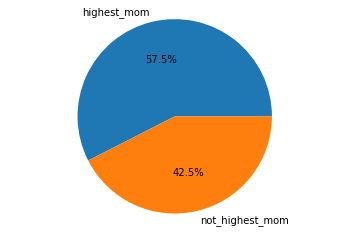

In [13]:
print(mom)
plt.pie([float(v) for v in mom.values()], labels=[k for k in mom.keys()],
           autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [15]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()

a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:15].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==0)|(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

CH Gayle


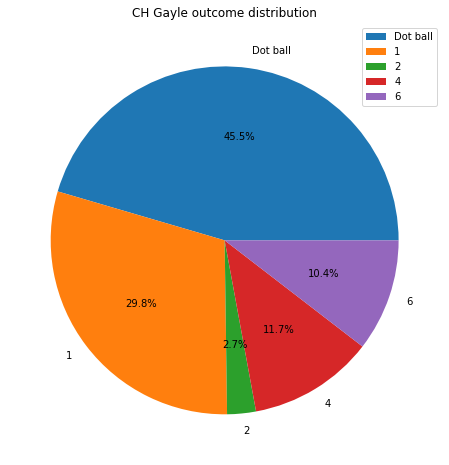

V Kohli


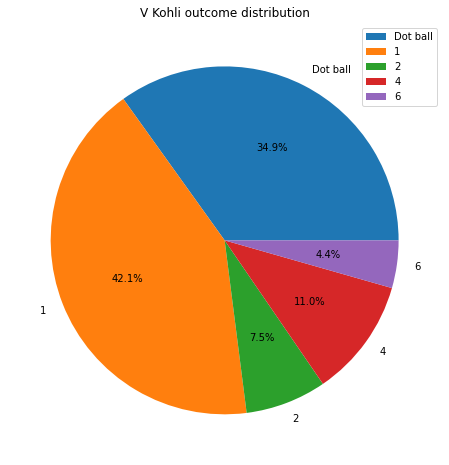

In [16]:
for batter in ["CH Gayle", "V Kohli"]:
    print(batter)
    plt.pie([c[col][batter] for col in c.columns], labels=["Dot ball", "1", "2", "4", "6"], autopct="%1.1f%%")
    plt.legend()
    plt.title(f"{batter} outcome distribution")
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    plt.savefig(f"Images\\EDA\\outcome_distribution_{batter}.png", dpi=300)
    plt.show()

In [1]:
from Utils.helper import res_to_string
for ind, result in enumerate(res_to_string):
    print(f"  {ind} & {result} \\\\ \n  \\hline")

  0 & Retired hurt \\ 
  \hline
  1 & Dot ball \\ 
  \hline
  2 & 1 run \\ 
  \hline
  3 & 2 runs \\ 
  \hline
  4 & 3 runs \\ 
  \hline
  5 & 4 runs \\ 
  \hline
  6 & 5 runs \\ 
  \hline
  7 & 6 runs \\ 
  \hline
  8 & Wkt bowled \\ 
  \hline
  9 & Wkt caught \\ 
  \hline
  10 & Wkt LBW \\ 
  \hline
  11 & Wkt stump \\ 
  \hline
  12 & Wkt hit wicket \\ 
  \hline
  13 & Wkt obstructing the field \\ 
  \hline
  14 & Wkt runout non striker 0 runs \\ 
  \hline
  15 & Wkt run out striker 0 runs \\ 
  \hline
  16 & Wkt run out non striker 1 run \\ 
  \hline
  17 & Wkt run out striker 1 run \\ 
  \hline
  18 & Wkt run out non striker 2 runs \\ 
  \hline
  19 & Wkt run out striker 2 runs \\ 
  \hline
  20 & Wkt run out non striker 3 runs \\ 
  \hline
  21 & Wkt run out striker 3 runs \\ 
  \hline
  22 & Wkt run out (no ball) non striker total 2 runs \\ 
  \hline
  23 & Wkt run out (no ball) striker total 2 runs \\ 
  \hline
  24 & Wkt run out non striker 1 run (LB/byes) \\ 
  \hline
  25 & 